 ### Algo and Process ###
 
 **Coupon CSV**
 
 This file placed in data folder is the source of data for our project

**prompt.ipynb**

This Python file will be used to verfiy logic and check data sets
It will be kind of rough work sheet for the final program

**checkCouponAcceptance.ipynb**

This file will have the final set of code to be executed

**Result folder**

This folder will store all the required graphs that comes out as an output

**Flow Details**

Final Objective: Will a customer accept the coupon?
 

----------------------------------------------------------------------------

**Import Required Libraries**


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [56]:
data = pd.read_csv('data/coupons.csv')

In [57]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11523,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,below21,Single,...,gt8,gt8,gt8,less1,1,0,0,0,1,1
602,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,never,4~8,1~3,less1,1,0,0,1,0,1
8070,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Male,21,Single,...,never,4~8,gt8,1~3,1,1,0,1,0,1
12405,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,1,0,1,0,1
7674,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Male,36,Single,...,never,1~3,less1,less1,1,0,0,0,1,0
6997,No Urgent Place,Kid(s),Rainy,55,6PM,Carry out & Take away,2h,Female,31,Married partner,...,1~3,less1,1~3,1~3,1,1,0,0,1,0
2221,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,36,Married partner,...,never,4~8,4~8,1~3,1,1,1,0,1,0
960,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Married partner,...,less1,1~3,4~8,less1,1,1,0,0,1,0
5682,Home,Alone,Sunny,80,6PM,Coffee House,1d,Male,21,Single,...,1~3,gt8,4~8,never,1,0,0,1,0,1
2407,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,50plus,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0


---
**2. Investigate the dataset for missing or problematic data.**
-

In [58]:
print(f"Length of Dataset:{len(data)}")
data.isnull().sum()

Length of Dataset:12684


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

---
**3. Decide what to do about your missing data -- drop, replace, other...**
-


This explains that major data is missing for vehicle related data. About 99% of the records are missing this information. So I will ignore this column in determing if a coupon will be accepted or not.

In [59]:
data = data.drop(columns=["car"], errors="ignore")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

---
**4. What proportion of the total observations chose to accept the coupon?**
-

Initially I will try and figure out a basic acceptance check

1. We will try to figure how many people have accepted vs not accepted
2. Next I will try to figure out the above result based on Gender
3. Third, I will try to figure out the acceptance result based on type of Restaurant provided in the coupon
4. Finally, we will get specific details based on gender and type of restaurant for which the coupon has been accepted


I will delete any record in case the value is blank for any of the fields for any row



I will analyze based on the 4 fields

1. coupon
2. gender
3. coupon accepted (Y)

For that I will modify the existing dataset to a new smaller and cleaner dataset: **ds_basic_acceptance**
It will have only the above 3 field and index field
I will update the field name of "Y" to "Coupon Accepted" and "coupon" to "Restaurant Type"

In [60]:
ds_basic_acceptance = data[["coupon","gender","Y"]]
ds_basic_acceptance = ds_basic_acceptance.rename(columns = {"coupon" : "Restaurant Type",
                                                           "Y" : "Coupon Accepted"})
ds_basic_acceptance.sample(10)

,Restaurant Type,gender,Coupon Accepted
10444,Restaurant(<20),Female,1
6848,Coffee House,Female,0
3298,Coffee House,Male,1
5554,Coffee House,Female,1
3860,Coffee House,Female,0
2226,Coffee House,Male,0
8766,Carry out & Take away,Female,0
9266,Coffee House,Male,0
9232,Bar,Male,1
3082,Coffee House,Male,0


**Accepted Vs Not Accepted**

In [61]:
label_map = {1: "Accepted", 0: "Rejected"}
total_number_of_coupon_accepted = ds_basic_acceptance["Coupon Accepted"].map(label_map).value_counts()
print(total_number_of_coupon_accepted)

Coupon Accepted
Accepted    7210
Rejected    5474
Name: count, dtype: int64


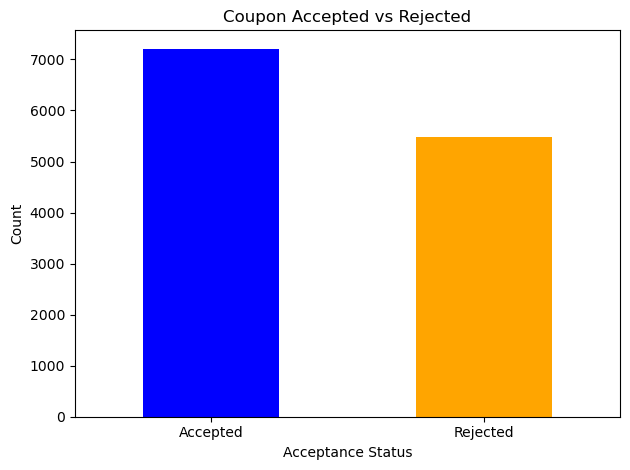

In [79]:
total_number_of_coupon_accepted.plot(kind="bar", color=["blue", "orange"])
plt.title("Coupon Accepted vs Rejected")
plt.xlabel("Acceptance Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/4a_accepted_vs_rejected.png")
plt.show()
plt.close()

**Accepted Vs Rejected based on Gender**

In [64]:
ds_basic_acceptance["acceptance_status"] = ds_basic_acceptance["Coupon Accepted"].map(label_map)

total_number_of_coupon_accepted_by_gender = ds_basic_acceptance.groupby("gender")["acceptance_status"].value_counts().unstack(fill_value=0)
print(total_number_of_coupon_accepted_by_gender)

acceptance_status  Accepted  Rejected
gender                               
Female                 3563      2948
Male                   3647      2526


In [41]:
ds_basic_acceptance.sample(10)

,Restaurant Type,gender,Coupon Accepted,acceptance_status
7643,Restaurant(20-50),Male,0,Rejected
9862,Carry out & Take away,Male,1,Accepted
2091,Restaurant(20-50),Female,0,Rejected
2180,Carry out & Take away,Male,0,Rejected
8979,Coffee House,Female,1,Accepted
11146,Restaurant(20-50),Female,0,Rejected
6718,Restaurant(<20),Female,1,Accepted
494,Coffee House,Male,1,Accepted
6551,Carry out & Take away,Female,1,Accepted
1589,Restaurant(<20),Male,1,Accepted


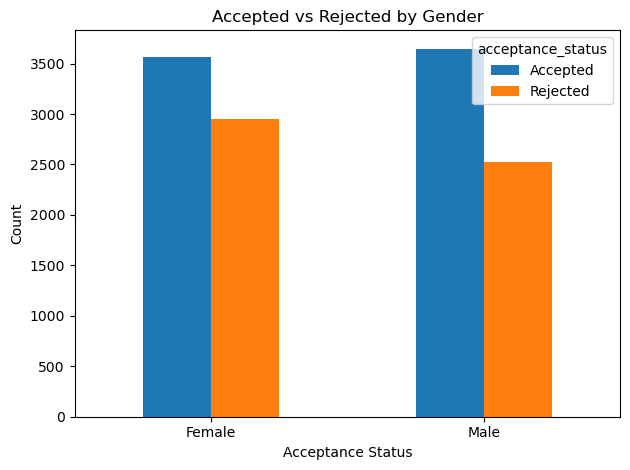

In [80]:
total_number_of_coupon_accepted_by_gender.plot(kind="bar")
plt.title("Accepted vs Rejected by Gender")
plt.xlabel("Acceptance Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/4b_accepted_vs_rejected_by_gender.png")
plt.show()
plt.close()

This plot explain Males are more prone to acceptance as their acceptance is Higher and rejection is Lower than Females

**Accepted Vs Rejected based on Gender and Type of Restaurant**

In [85]:
total_number_of_coupon_accepted_by_gender_by_type = ds_basic_acceptance.groupby(["gender","Restaurant Type"])["acceptance_status"].value_counts().unstack(fill_value=0)
print(total_number_of_coupon_accepted_by_gender_by_type)

acceptance_status             Accepted  Rejected
gender Restaurant Type                          
Female Bar                         356       689
       Carry out & Take away       885       355
       Coffee House               1010      1041
       Restaurant(20-50)           322       432
       Restaurant(<20)             990       431
Male   Bar                         471       501
       Carry out & Take away       875       278
       Coffee House                985       960
       Restaurant(20-50)           336       402
       Restaurant(<20)             980       385


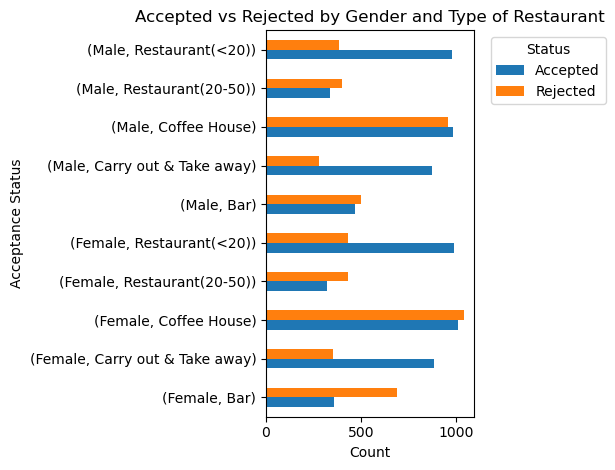

In [100]:
total_number_of_coupon_accepted_by_gender_by_type.plot(kind="barh")

plt.title("Accepted vs Rejected by Gender and Type of Restaurant")
plt.xlabel("Count")
plt.ylabel("Acceptance Status")
plt.xticks(rotation=0)
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("plots/4c_accepted_vs_rejected_by_gender_by_type.png")
plt.show()
plt.close()

**Accepted Vs Rejected based on Type of Restaurant**

In [98]:
total_number_of_coupon_accepted_by_type = ds_basic_acceptance.groupby("Restaurant Type")["acceptance_status"].value_counts().unstack(fill_value=0)
print(total_number_of_coupon_accepted_by_type)

acceptance_status      Accepted  Rejected
Restaurant Type                          
Bar                         827      1190
Carry out & Take away      1760       633
Coffee House               1995      2001
Restaurant(20-50)           658       834
Restaurant(<20)            1970       816


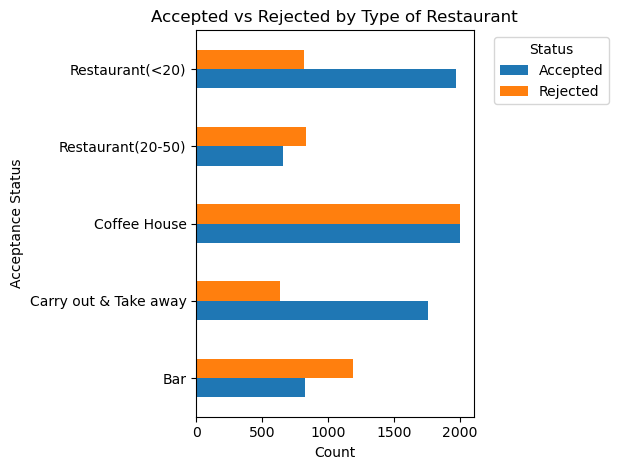

In [101]:
total_number_of_coupon_accepted_by_type.plot(kind="barh")

plt.title("Accepted vs Rejected by Type of Restaurant")
plt.xlabel("Count")
plt.ylabel("Acceptance Status")
plt.xticks(rotation=0)
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("plots/4d_accepted_vs_rejected_by_type.png")
plt.show()
plt.close()

---
**Inference**
-

So what can we understand from above analysis performed:
1. Males are more prone to accept Coupons
2. Restaurant < 20 and Carry-out/Take away has higher percentage of acceptance amongst both Men and Women
3. Coffee has almost equal acceptance or rejection
4. People are avoiding high end restaurant and bars
5. Bars are having the highest rejection, which gives a place for additional research as to when or by whom such coupons are more accepted or rejected

---
**5. Use a bar plot to visualize the `coupon` column. **
-

In [103]:
total_number_of_coupon_by_type = ds_basic_acceptance['Restaurant Type'].value_counts()
print(total_number_of_coupon_by_type)

Restaurant Type
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


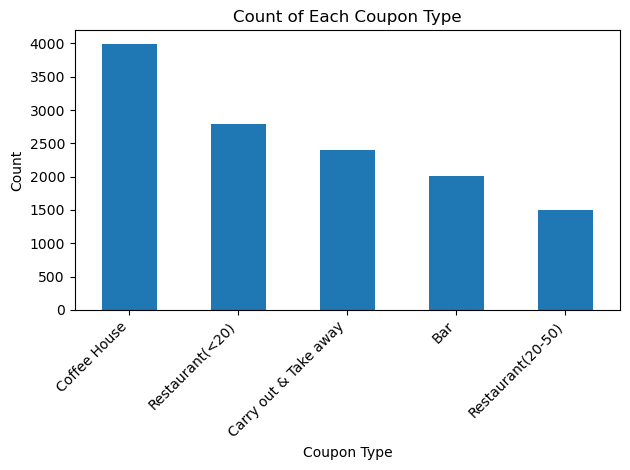

In [105]:
total_number_of_coupon_by_type.plot(kind='bar')

plt.title("Count of Each Coupon Type")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("plots/5_coupons_by_type.png")
plt.show()
plt.close()

---
**Infernece**
-

1. Coffee House is the highest offered coupon but gets the highest rejection. We can analyze the most favourable condition of acceptance and improve the rate
2. Restaurants (<20) and Carry-out might be promoted more as the acceptance rate is higher
3. We need further analysis on Bar and Restaurant (20-50)

---
**6. Use a histogram to visualize the temperature column.**
-


In [109]:
#ds_additional_analysis = ds_basic_acceptance
ds_additional_analysis = ds_basic_acceptance.merge(data[['temperature']], left_index=True, right_index=True, how='left')
ds_additional_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Restaurant Type    12684 non-null  object
 1   gender             12684 non-null  object
 2   Coupon Accepted    12684 non-null  int64 
 3   acceptance_status  12684 non-null  object
 4   temperature        12684 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 495.6+ KB


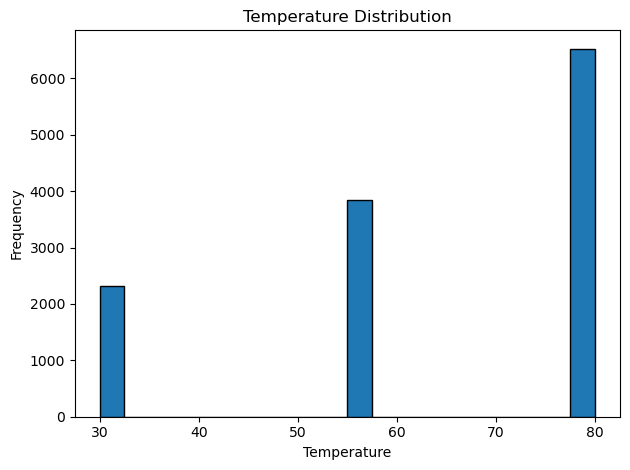

In [113]:
plt.hist(ds_additional_analysis['temperature'], bins=20, edgecolor='black')

plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("plots/6a_temperature_hist.png")
plt.show()
plt.close()

So there are mainly 3 temperatures: 30(Snowy), 55(Rainy), 80(Sunny) with most coupons getting offered during Sunny days

Usually, people would love to go to Coffee house when it is Snowy or Rainy.
I will take the above data and try to find out if my assumption is correct or the rejection of Coffee House coupon is irrespective of the temperature

In [127]:
ds_additional_analysis_filtered = ds_additional_analysis[ds_additional_analysis['Restaurant Type'] == "Coffee House"]
ds_additional_analysis_filtered.sample(10)

total_number_of_coffee_house_coupon_accepted_by_temperature = ds_additional_analysis_filtered.groupby('temperature')['acceptance_status'].value_counts().unstack(fill_value=0)

print(total_number_of_coffee_house_coupon_accepted_by_temperature)

acceptance_status  Accepted  Rejected
temperature                          
30                      141       177
55                      582       695
80                     1272      1129


So seems my assumption was incorrect.
Maximum offer for Coffee House coupon was during Sunny day with greater acceptance. On other day condition the rejection was higher

In [129]:
total_number_of_coupon_accepted_by_temperature_by_type = ds_additional_analysis.groupby(['temperature','Restaurant Type'])['acceptance_status'].value_counts().unstack(fill_value=0)
print(total_number_of_coupon_accepted_by_temperature_by_type)

acceptance_status                  Accepted  Rejected
temperature Restaurant Type                          
30          Bar                         139       287
            Carry out & Take away       568       183
            Coffee House                141       177
            Restaurant(20-50)            92       181
            Restaurant(<20)             290       258
55          Bar                         427       529
            Carry out & Take away       414       162
            Coffee House                582       695
            Restaurant(20-50)           156       212
            Restaurant(<20)             482       181
80          Bar                         261       374
            Carry out & Take away       778       288
            Coffee House               1272      1129
            Restaurant(20-50)           410       441
            Restaurant(<20)            1198       377


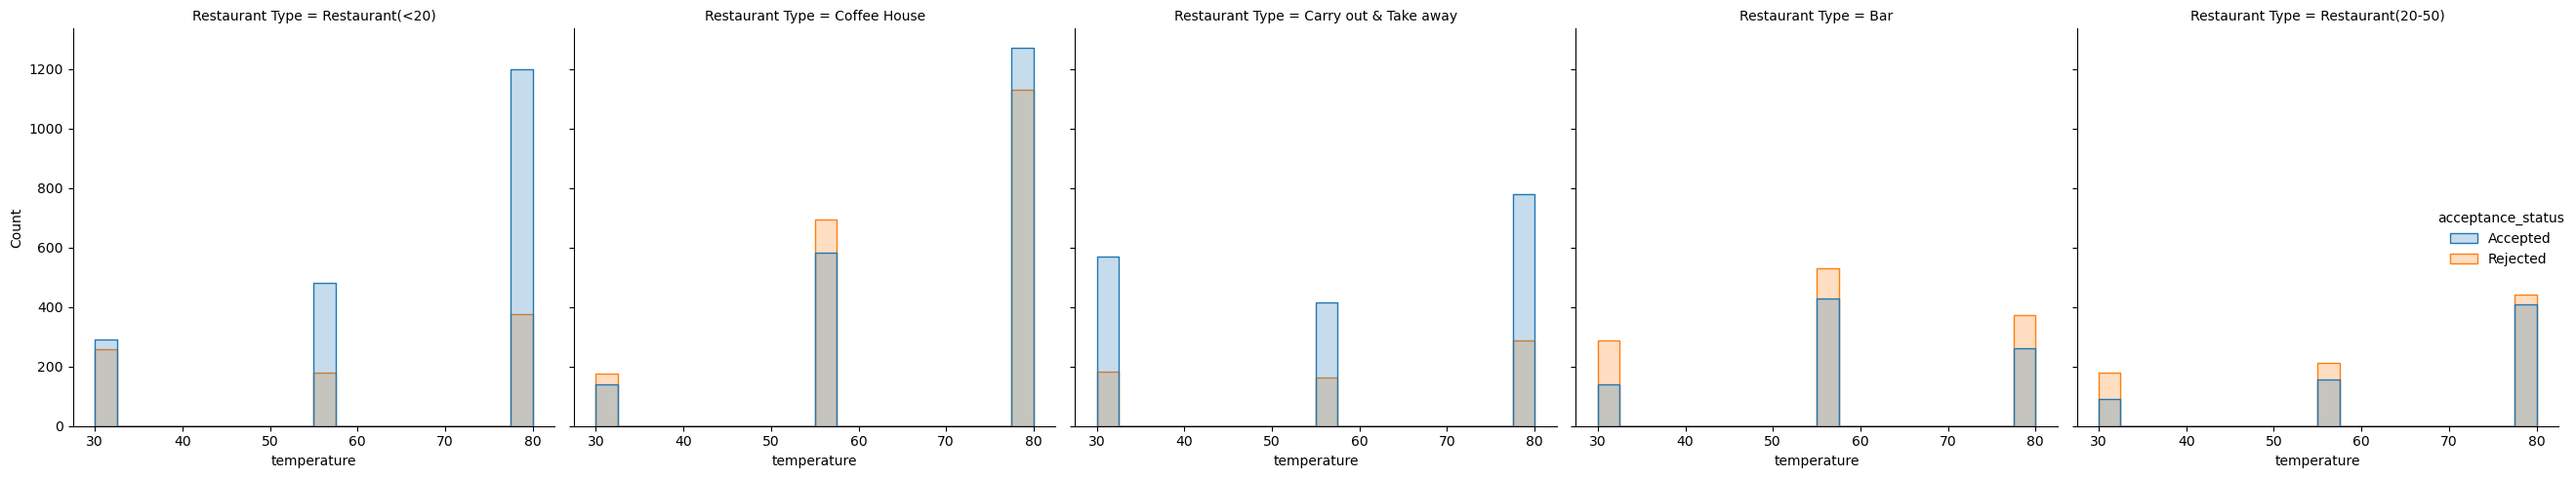

In [137]:
sns.displot( data=ds_additional_analysis, x="temperature", hue="acceptance_status", col="Restaurant Type", bins=20, kde=False, element="step" )
plt.tight_layout()
plt.savefig("plots/6b_temperature_type_hist.png")
plt.show()
plt.close()

---
**BAR COUPONS**
-

---

**1. Create a new `DataFrame` that contains just the bar coupons.**
-

In [147]:
ds_bar_filtered = ds_additional_analysis[ds_additional_analysis['Restaurant Type'] == "Bar"]
ds_bar_filtered.sample(10)

,Restaurant Type,gender,Coupon Accepted,acceptance_status,temperature
11640,Bar,Male,1,Accepted,55
11477,Bar,Female,1,Accepted,55
10413,Bar,Female,0,Rejected,55
12569,Bar,Male,1,Accepted,80
6918,Bar,Male,0,Rejected,30
11802,Bar,Male,0,Rejected,30
3791,Bar,Female,1,Accepted,55
3663,Bar,Female,0,Rejected,55
9695,Bar,Male,1,Accepted,55
10610,Bar,Female,0,Rejected,55


---
**2. What proportion of bar coupons were accepted?**
-

In [140]:
total_number_of_bar_coupon_accepted = ds_bar_filtered["acceptance_status"].value_counts()
print(total_number_of_bar_coupon_accepted)

acceptance_status
Rejected    1190
Accepted     827
Name: count, dtype: int64


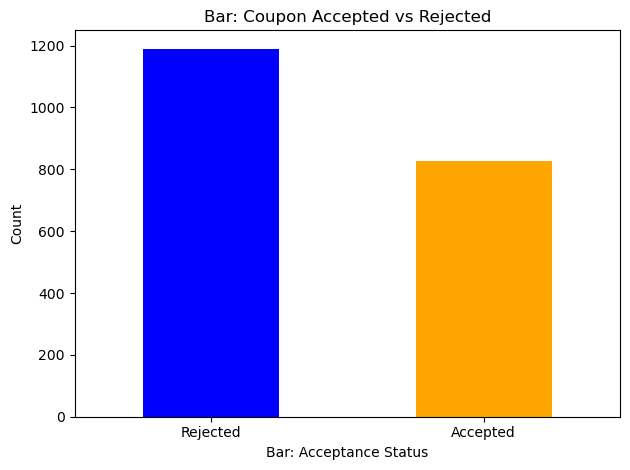

In [142]:
total_number_of_bar_coupon_accepted.plot(kind="bar", color=["blue", "orange"])
plt.title("Bar: Coupon Accepted vs Rejected")
plt.xlabel("Bar: Acceptance Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/bar_accepted_vs_rejected.png")
plt.show()
plt.close()

---
**3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.**
-

In [148]:
ds_bar_filtered = ds_bar_filtered.merge(data[['Bar']], left_index=True, right_index=True, how='left')
ds_bar_filtered.columns

Index(['Restaurant Type', 'gender', 'Coupon Accepted', 'acceptance_status',
       'temperature', 'Bar'],
      dtype='object')

In [149]:
print(f'Length before cleaning:{len(ds_bar_filtered)}')
ds_bar_filtered = ds_bar_filtered.dropna(subset =['Bar'])
print(f'Length after cleaning:{len(ds_bar_filtered)}')

Length before cleaning:2017
Length after cleaning:1996


So we have 1996 person records who have been offered Bar Coupons and have details about the number of times they visit bar in a month

In [150]:
ds_bar_filtered['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [151]:
ds_bar_filtered['Frequency'] = np.where(
    (ds_bar_filtered['Bar'] == 'never') | (ds_bar_filtered['Bar'] == 'less1') | (ds_bar_filtered['Bar'] == '1~3'),
    'Less Frequent', 'Often')
ds_bar_filtered.sample(10)

,Restaurant Type,gender,Coupon Accepted,acceptance_status,temperature,Bar,Frequency
5623,Bar,Male,0,Rejected,80,4~8,Often
9781,Bar,Male,1,Accepted,30,4~8,Often
3681,Bar,Male,0,Rejected,55,less1,Less Frequent
10162,Bar,Male,1,Accepted,55,less1,Less Frequent
6316,Bar,Female,0,Rejected,80,less1,Less Frequent
3281,Bar,Female,0,Rejected,80,less1,Less Frequent
10560,Bar,Male,1,Accepted,55,4~8,Often
2925,Bar,Female,1,Accepted,80,1~3,Less Frequent
9793,Bar,Male,1,Accepted,55,4~8,Often
11988,Bar,Female,0,Rejected,30,never,Less Frequent


In [152]:
total_bar_coupon_accepted_by_frequent = ds_bar_filtered.groupby("Frequency")["acceptance_status"].value_counts().unstack(fill_value=0)
print(total_bar_coupon_accepted_by_frequent)

acceptance_status  Accepted  Rejected
Frequency                            
Less Frequent           666      1131
Often                   153        46


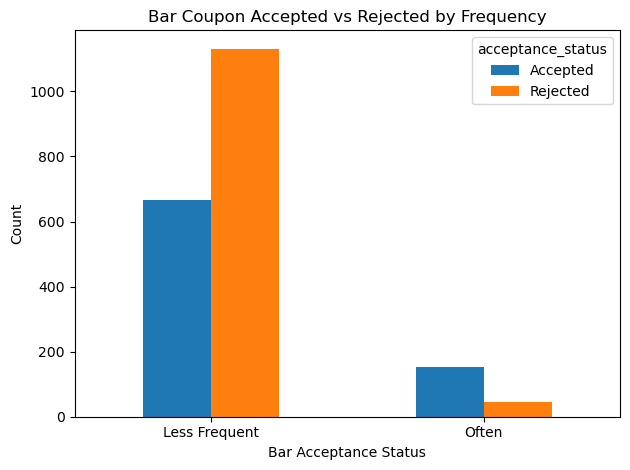

In [153]:
total_bar_coupon_accepted_by_frequent.plot(kind="bar")
plt.title("Bar Coupon Accepted vs Rejected by Frequency")
plt.xlabel("Bar Acceptance Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/bar_b_accepted_vs_rejected_by_frequency.png")
plt.show()
plt.close()

This clearly demonstrates that people who go to Bar less often have rejected coupons for Bars. On the contrary people visiting Bars on a regular basis have a much higher rate of acceptance. 

---
**4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?**
-

In [168]:
ds_bar_filtered = ds_bar_filtered.drop(columns=['age'], errors='ignore')
ds_bar_filtered = ds_bar_filtered.merge(data[['age']], left_index=True, right_index=True, how='left')
ds_bar_filtered = ds_bar_filtered.drop(columns=ds_bar_filtered.filter(regex='(_x$|_y$)').columns)
ds_bar_filtered.columns
#ds_bar_filtered.sample(5)

Index(['Restaurant Type', 'gender', 'Coupon Accepted', 'acceptance_status',
       'temperature', 'Bar', 'Frequency', 'age'],
      dtype='object')

In [169]:
ds_bar_filtered['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [172]:
ds_bar_filtered['Frequency_morethan1_25yr'] = np.where(
    (
        (ds_bar_filtered['age'] != 'below21') & 
        (ds_bar_filtered['age'] != '21')
    ) &
    (
        (ds_bar_filtered['Bar'] != 'never') & 
        (ds_bar_filtered['Bar'] != 'less1')
    ),
    'TargetAudi',
    'Outliers'
)

ds_bar_filtered.sample(10)

,Restaurant Type,gender,Coupon Accepted,acceptance_status,temperature,Bar,Frequency,age,Frequency_morethan1_25yr
3289,Bar,Female,1,Accepted,55,less1,Less Frequent,31,Outliers
1153,Bar,Female,0,Rejected,80,less1,Less Frequent,31,Outliers
9960,Bar,Male,0,Rejected,30,never,Less Frequent,31,Outliers
5383,Bar,Male,1,Accepted,80,4~8,Often,26,TargetAudi
10480,Bar,Female,0,Rejected,30,1~3,Less Frequent,31,TargetAudi
9715,Bar,Female,1,Accepted,30,never,Less Frequent,46,Outliers
3428,Bar,Male,1,Accepted,80,4~8,Often,26,TargetAudi
10777,Bar,Female,1,Accepted,80,never,Less Frequent,31,Outliers
867,Bar,Female,0,Rejected,80,never,Less Frequent,26,Outliers
3377,Bar,Male,1,Accepted,55,never,Less Frequent,26,Outliers


In [173]:
total_bar_coupon_accepted_by_morethan1_25yr = ds_bar_filtered.groupby("Frequency_morethan1_25yr")["acceptance_status"].value_counts().unstack(fill_value=0)
print(total_bar_coupon_accepted_by_morethan1_25yr)

acceptance_status         Accepted  Rejected
Frequency_morethan1_25yr                    
Outliers                       527      1049
TargetAudi                     292       128


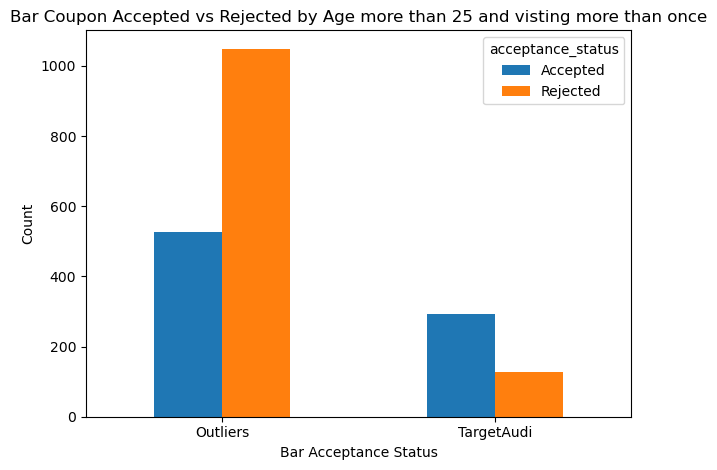

In [174]:
total_bar_coupon_accepted_by_morethan1_25yr.plot(kind="bar")
plt.title("Bar Coupon Accepted vs Rejected by Age more than 25 and visting more than once")
plt.xlabel("Bar Acceptance Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/bar_c_accepted_vs_rejected_by_frequency_morethan1_25yr.png")
plt.show()
plt.close()

---
**Inference**
-

People who are less frequent visitors to bar ignore the coupon irrespective of age

But people above 25 years who visits bar often shows almost double chances of accepting the Bar coupon

---
**5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**
-

In [175]:
ds_bar_filtered = ds_bar_filtered.drop(columns=['passanger','occupation'], errors='ignore')
ds_bar_filtered = ds_bar_filtered.merge(data[['passanger','occupation']], left_index=True, right_index=True, how='left')
ds_bar_filtered = ds_bar_filtered.drop(columns=ds_bar_filtered.filter(regex='(_x$|_y$)').columns)
ds_bar_filtered.columns

Index(['Restaurant Type', 'gender', 'Coupon Accepted', 'acceptance_status',
       'temperature', 'Bar', 'Frequency', 'age', 'Frequency_morethan1_25yr',
       'passanger', 'occupation'],
      dtype='object')

In [176]:
ds_bar_filtered.sample(5)

,Restaurant Type,gender,Coupon Accepted,acceptance_status,temperature,Bar,Frequency,age,Frequency_morethan1_25yr,passanger,occupation
10851,Bar,Male,1,Accepted,80,1~3,Less Frequent,41,TargetAudi,Friend(s),Business & Financial
10818,Bar,Female,0,Rejected,30,gt8,Often,31,TargetAudi,Alone,Legal
10539,Bar,Female,0,Rejected,55,never,Less Frequent,50plus,Outliers,Alone,Retired
2465,Bar,Female,1,Accepted,55,1~3,Less Frequent,21,Outliers,Alone,Unemployed
5544,Bar,Female,0,Rejected,80,never,Less Frequent,41,Outliers,Alone,Education&Training&Library


In [179]:
ds_bar_filtered['passanger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [180]:
ds_bar_filtered['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [181]:
ds_bar_filtered['Frequency_morethan1_notwithkid_notFFF'] = np.where(
    (
        (ds_bar_filtered['passanger'] != 'Kid(s)') 
    ) &
    (
        (ds_bar_filtered['Bar'] != 'never') & 
        (ds_bar_filtered['Bar'] != 'less1')
    ) &
    (
        (ds_bar_filtered['occupation'] != 'Farming Fishing & Forestry')
    ),
    'TargetAudi',
    'Outliers'
)


ds_bar_filtered.sample(5)

,Restaurant Type,gender,Coupon Accepted,acceptance_status,temperature,Bar,Frequency,age,Frequency_morethan1_25yr,passanger,occupation,Frequency_morethan1_notwithkid_notFFF
2425,Bar,Female,1,Accepted,55,4~8,Often,21,Outliers,Alone,Arts Design Entertainment Sports & Media,TargetAudi
2064,Bar,Female,1,Accepted,55,4~8,Often,36,TargetAudi,Alone,Arts Design Entertainment Sports & Media,TargetAudi
3831,Bar,Female,0,Rejected,80,never,Less Frequent,50plus,Outliers,Kid(s),Arts Design Entertainment Sports & Media,Outliers
8257,Bar,Female,0,Rejected,30,less1,Less Frequent,36,Outliers,Kid(s),Healthcare Practitioners & Technical,Outliers
5259,Bar,Male,0,Rejected,80,never,Less Frequent,50plus,Outliers,Alone,Retired,Outliers


In [183]:
total_bar_coupon_accepted_by_morethan1_notkid_notfff = ds_bar_filtered.groupby("Frequency_morethan1_notwithkid_notFFF")["acceptance_status"].value_counts().unstack(fill_value=0)
print(total_bar_coupon_accepted_by_morethan1_notkid_notfff)

acceptance_status                      Accepted  Rejected
Frequency_morethan1_notwithkid_notFFF                    
Outliers                                    426      1019
TargetAudi                                  393       158


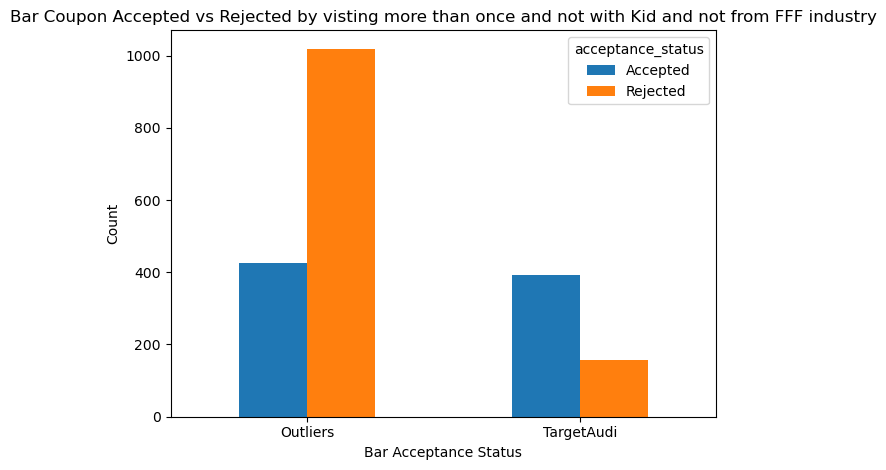

In [184]:
total_bar_coupon_accepted_by_morethan1_notkid_notfff.plot(kind="bar")
plt.title("Bar Coupon Accepted vs Rejected by visting more than once and not with Kid and not from FFF industry")
plt.xlabel("Bar Acceptance Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/bar_d_accepted_vs_rejected_by_frequency_morethan1_nokid_notfff.png")
plt.show()
plt.close()

---
**Inference**
-

It clearly shows that this segment of Audience(drivers) has a great acceptance rate. The Acceptance is more than twice as high as the rejection.

Similarly the outliers have rejected the coupon a great deal.

Hence it is a great segment to target for Bar coupons

---
**6. Compare the acceptance rates between those drivers who:** 
-

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.


In [188]:
ds_basic_acceptance.columns

Index(['Restaurant Type', 'gender', 'Coupon Accepted', 'acceptance_status'], dtype='object')

In [199]:
ds_filter_multiple.columns

Index(['Restaurant Type', 'acceptance_status', 'age', 'Bar',
       'RestaurantLessThan20', 'income'],
      dtype='object')

In [191]:
ds_filter_multiple = ds_basic_acceptance.drop(columns=['gender','Coupon Accepted'], errors='ignore')

In [192]:
ds_filter_multiple.sample(5)

,Restaurant Type,acceptance_status
9919,Coffee House,Rejected
9130,Restaurant(20-50),Rejected
12017,Coffee House,Accepted
7696,Restaurant(<20),Rejected
7286,Coffee House,Rejected


In [210]:
ds_filter_multiple = ds_filter_multiple.drop(columns=['age','Bar','RestaurantLessThan20','income','passanger','maritalStatus'], errors='ignore')
ds_filter_multiple = ds_filter_multiple.merge(data[['age','Bar','RestaurantLessThan20','income','passanger','maritalStatus']], left_index=True, right_index=True, how='left')
ds_filter_multiple = ds_filter_multiple.drop(columns=ds_filter_multiple.filter(regex='(_x$|_y$)').columns)

In [211]:
ds_filter_multiple.sample(5)

,Restaurant Type,acceptance_status,Audience Status,age,Bar,RestaurantLessThan20,income,passanger,maritalStatus
11788,Restaurant(<20),Accepted,Outliers,41,less1,less1,$62500 - $74999,Kid(s),Married partner
627,Coffee House,Accepted,Outliers,21,never,gt8,$25000 - $37499,Alone,Married partner
3265,Coffee House,Rejected,Outliers,21,never,less1,$25000 - $37499,Alone,Married partner
12021,Bar,Accepted,TargetAudi,21,1~3,less1,$87500 - $99999,Friend(s),Single
8889,Carry out & Take away,Rejected,TargetAudi,26,4~8,1~3,$37500 - $49999,Alone,Single


In [200]:
ds_filter_multiple['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [203]:
ds_filter_multiple['age'].dtype

dtype('O')

In [201]:
ds_filter_multiple['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [202]:
ds_filter_multiple['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [204]:
ds_filter_multiple['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [212]:
ds_filter_multiple['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [214]:
ds_filter_multiple['Audience Status'] = np.where(
    (
        # go to bars more than once a month, had passengers that were not a kid, and were not widowed
        (ds_filter_multiple['passanger'] != 'Kid(s)') &
        (~ds_filter_multiple['Bar'].isin(['never', 'less1'])) &
        (ds_filter_multiple['maritalStatus'] != 'Widowed')
    )
    |
    (
        # go to bars more than once a month and are under the age of 30
        (~ds_filter_multiple['age'].isin(['below21', '21', '26'])) &
        (~ds_filter_multiple['Bar'].isin(['never', 'less1']))
    )
    |
    (
        # go to cheap restaurants more than 4 times a month and income is less than 50K
        (ds_filter_multiple['income'].isin([
            '$12500 - $24999',
            '$25000 - $37499',
            '$37500 - $49999'
        ]))
        &
        (ds_filter_multiple['RestaurantLessThan20'].isin(['4~8', 'gt8']))
    ),
    'TargetAudi',
    'Outliers'
)

ds_filter_multiple.sample(15)

,Restaurant Type,acceptance_status,Audience Status,age,Bar,RestaurantLessThan20,income,passanger,maritalStatus
10378,Carry out & Take away,Rejected,TargetAudi,26,1~3,4~8,$62500 - $74999,Alone,Unmarried partner
1203,Bar,Rejected,TargetAudi,31,1~3,4~8,$12500 - $24999,Kid(s),Married partner
4141,Coffee House,Accepted,Outliers,26,never,gt8,$100000 or More,Alone,Married partner
1233,Restaurant(20-50),Accepted,Outliers,below21,never,never,$62500 - $74999,Alone,Single
1921,Bar,Rejected,TargetAudi,31,less1,gt8,$25000 - $37499,Friend(s),Single
3004,Restaurant(<20),Accepted,TargetAudi,31,1~3,less1,$12500 - $24999,Alone,Divorced
11735,Restaurant(<20),Accepted,TargetAudi,21,1~3,4~8,$87500 - $99999,Friend(s),Unmarried partner
6414,Bar,Accepted,Outliers,26,1~3,gt8,$100000 or More,Kid(s),Married partner
1822,Bar,Rejected,Outliers,50plus,never,1~3,$50000 - $62499,Alone,Married partner
4180,Coffee House,Rejected,Outliers,26,less1,less1,Less than $12500,Alone,Single


In [215]:
total_coupon_accepted_multiple_criteria = ds_filter_multiple.groupby("Audience Status")["acceptance_status"].value_counts().unstack(fill_value=0)
print(total_coupon_accepted_multiple_criteria)

acceptance_status  Accepted  Rejected
Audience Status                      
Outliers               4147      3479
TargetAudi             3063      1995


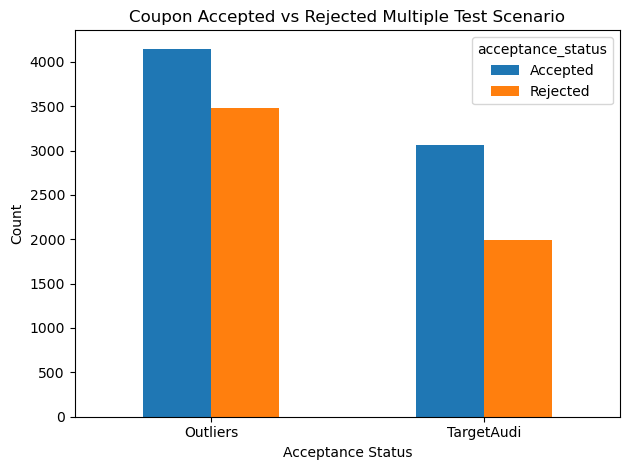

In [216]:
total_coupon_accepted_multiple_criteria.plot(kind="bar")
plt.title("Coupon Accepted vs Rejected Multiple Test Scenario")
plt.xlabel("Acceptance Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/multiple_condition_accepted_vs_rejected.png")
plt.show()
plt.close()

---
**Inference**
-

Based on above graph plotted the acceptance of the coupon is greater for both Targeted Audience and the Outliers with slight higher acceptance ratio for the targeted audience

---
**7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?**
-

From all the above analysis my understanding is,

1. Coupon targetting is more on the success rate
2. But Bar coupons are not very much accepted
3. Still the acceptance is higher for those usually goes to bar often in a month
4. Moreover people over the age of 25 tend to accept bar coupon more
5. It also depicts that drivers with no kids and not belonging from Farming Fishing & Forest industry are one of the highest Bar coupon acceptors

---

---
**Independent Investigation**
-

---

1. Check if there is a specific time when people accept more coupons


In [222]:
ds_time_of_the_day = data[["coupon","time","Y"]]
ds_time_of_the_day = ds_time_of_the_day.rename(columns = {"coupon" : "Restaurant Type",
                                                           "Y" : "Coupon Accepted"})
ds_time_of_the_day["Accepted?"] = ds_time_of_the_day["Coupon Accepted"].map(label_map)
ds_time_of_the_day = ds_time_of_the_day.dropna(subset =['time'])

ds_time_of_the_day.sample(10)

,Restaurant Type,time,Coupon Accepted,Accepted?
3833,Restaurant(<20),2PM,0,Rejected
11863,Carry out & Take away,7AM,0,Rejected
3385,Coffee House,2PM,0,Rejected
2072,Coffee House,7AM,0,Rejected
12544,Bar,7AM,0,Rejected
4611,Bar,10AM,0,Rejected
9995,Coffee House,10AM,1,Accepted
6154,Restaurant(20-50),6PM,0,Rejected
6678,Coffee House,6PM,0,Rejected
7541,Coffee House,2PM,0,Rejected


In [223]:
total_coupon_accepted_time = ds_time_of_the_day.groupby(["time","Restaurant Type"])["Accepted?"].value_counts().unstack(fill_value=0)
print(total_coupon_accepted_time)

Accepted?                   Accepted  Rejected
time Restaurant Type                          
10AM Bar                         161       283
     Carry out & Take away       363       154
     Coffee House                576       323
     Restaurant(20-50)            69        43
     Restaurant(<20)             215        88
10PM Bar                         184       218
     Carry out & Take away       350       111
     Coffee House                126       171
     Restaurant(20-50)           125       256
     Restaurant(<20)             235       230
2PM  Bar                          40        78
     Carry out & Take away       189        29
     Coffee House                435       359
     Restaurant(20-50)            98        84
     Restaurant(<20)             567       130
6PM  Bar                         264       302
     Carry out & Take away       359        76
     Coffee House                451       642
     Restaurant(20-50)           195       193
     Restaura

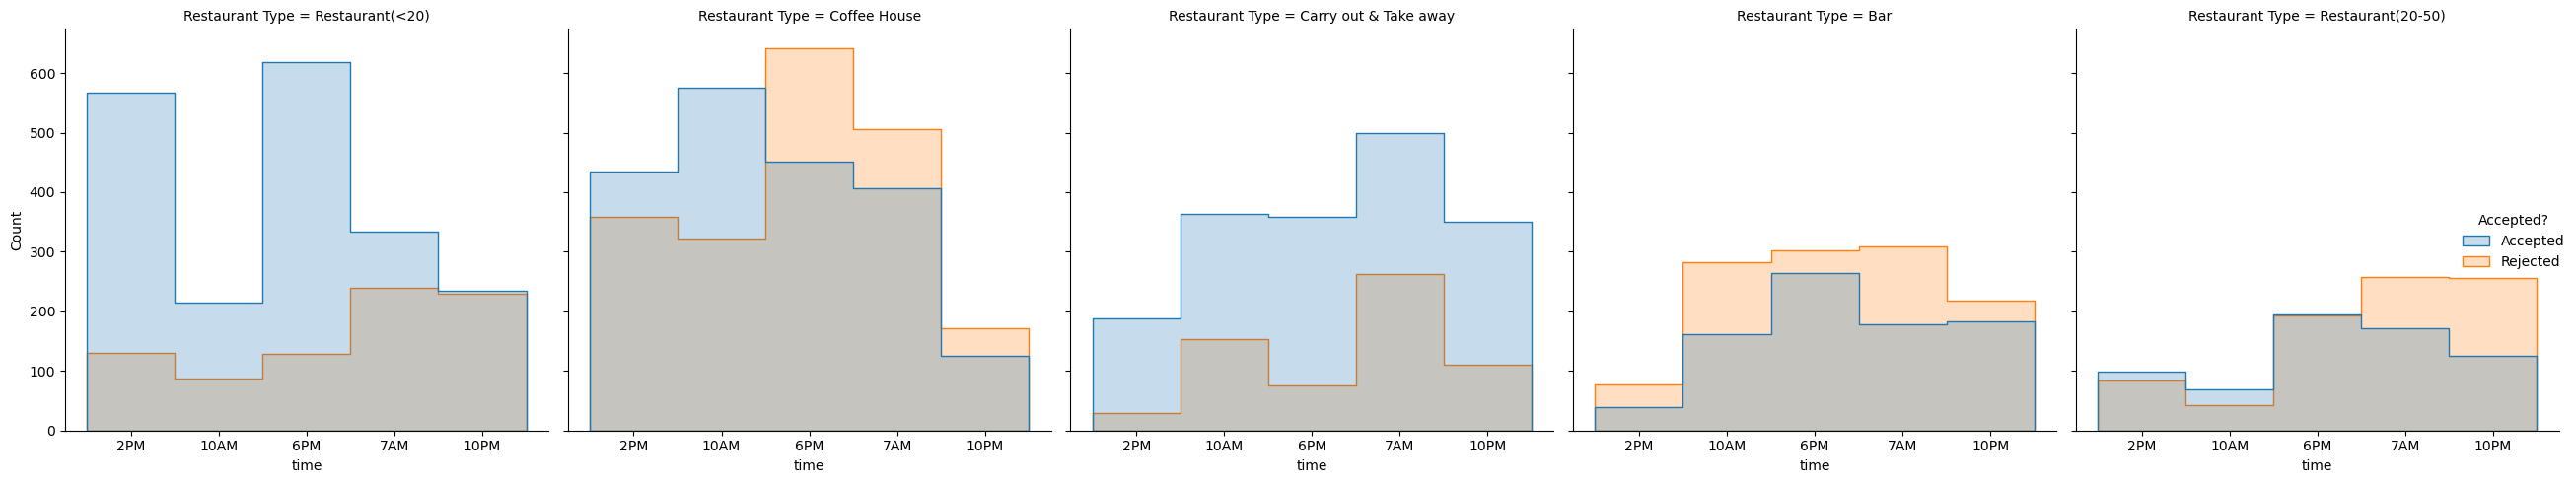

In [224]:
sns.displot( data=ds_time_of_the_day, x="time", hue="Accepted?", col="Restaurant Type", bins=20, kde=False, element="step" )
plt.tight_layout()
plt.savefig("plots/added_time_type_hist.png")
plt.show()
plt.close()

---
This shows that

1. Cheap restaurants have higher acceptance rates at any time. Its peak acceptance is during Lunch and Dinner time. It fades out during Late night dinner time
2. On the contrary, although Carry out and Take Away also high acceptance rate, but its peak is at early morning and late night dinner time
3. Coffee coupons are more accepted during the early office hours of the day
4. Bar always potrays a higher rejection irrespctive of the time of the day
5. High end resturants have a slight high acceptance during the lunch time

---
2. Does People without Spouse tend to accept Restaurant Coupons? If yes which type: Cheap or High End

In [226]:
ds_without_spouse_restaurant = data[["coupon","maritalStatus","Y",'RestaurantLessThan20','Restaurant20To50']]
ds_without_spouse_restaurant = ds_without_spouse_restaurant.rename(columns = {"coupon" : "Restaurant Type",
                                                           "Y" : "Coupon Accepted"})
ds_without_spouse_restaurant["Accepted?"] = ds_without_spouse_restaurant["Coupon Accepted"].map(label_map)
ds_without_spouse_restaurant = ds_without_spouse_restaurant.dropna(subset =['maritalStatus'])

ds_without_spouse_restaurant['WO Spouse Going to Restaurant'] = np.where(
    (
        (
            ds_without_spouse_restaurant['RestaurantLessThan20'].isin(['1~3', '4~8', 'gt8']) |
            ds_without_spouse_restaurant['Restaurant20To50'].isin(['1~3', '4~8'])
        )
        &
        (ds_without_spouse_restaurant['maritalStatus'] != 'Married partner')
    ),
    'TargetAudi',
    'Outliers'
)

ds_without_spouse_restaurant.sample(10)

,Restaurant Type,maritalStatus,Coupon Accepted,RestaurantLessThan20,Restaurant20To50,Accepted?,WO Spouse Going to Restaurant
4255,Coffee House,Single,0,4~8,1~3,Rejected,TargetAudi
10829,Carry out & Take away,Single,1,1~3,less1,Accepted,TargetAudi
7047,Carry out & Take away,Unmarried partner,1,4~8,less1,Accepted,TargetAudi
12067,Bar,Married partner,0,1~3,NaN,Rejected,Outliers
5523,Coffee House,Single,0,less1,1~3,Rejected,TargetAudi
2081,Carry out & Take away,Divorced,0,gt8,1~3,Rejected,TargetAudi
623,Coffee House,Married partner,0,gt8,1~3,Rejected,Outliers
2760,Coffee House,Married partner,0,less1,less1,Rejected,Outliers
788,Coffee House,Married partner,0,less1,never,Rejected,Outliers
161,Restaurant(<20),Single,1,gt8,gt8,Accepted,TargetAudi


In [228]:
ds_without_spouse_restaurant['Restaurant Type'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [231]:
#filter coupon for Restaurant Type
ds_without_spouse_restaurant = ds_without_spouse_restaurant[ds_without_spouse_restaurant['Restaurant Type'].isin(['Restaurant(<20)','Restaurant(20-50)'])]
                                                                                                                
ds_without_spouse_restaurant.sample(10)

,Restaurant Type,maritalStatus,Coupon Accepted,RestaurantLessThan20,Restaurant20To50,Accepted?,WO Spouse Going to Restaurant
11392,Restaurant(<20),Married partner,1,less1,less1,Accepted,Outliers
3123,Restaurant(<20),Unmarried partner,0,1~3,less1,Rejected,TargetAudi
7325,Restaurant(20-50),Single,1,1~3,1~3,Accepted,TargetAudi
8598,Restaurant(20-50),Unmarried partner,0,1~3,never,Rejected,TargetAudi
12348,Restaurant(<20),Single,1,4~8,1~3,Accepted,TargetAudi
10655,Restaurant(20-50),Unmarried partner,0,4~8,1~3,Rejected,TargetAudi
2422,Restaurant(20-50),Single,0,4~8,less1,Rejected,TargetAudi
8319,Restaurant(<20),Married partner,1,4~8,4~8,Accepted,Outliers
8401,Restaurant(20-50),Single,0,gt8,less1,Rejected,TargetAudi
8407,Restaurant(<20),Single,1,gt8,less1,Accepted,TargetAudi


In [233]:
total_coupon_accepted_wospouse_restaurant = ds_without_spouse_restaurant.groupby(["Restaurant Type","WO Spouse Going to Restaurant"])["Accepted?"].value_counts().unstack(fill_value=0)
print(total_coupon_accepted_wospouse_restaurant)

Accepted?                                        Accepted  Rejected
Restaurant Type   WO Spouse Going to Restaurant                    
Restaurant(20-50) Outliers                            339       457
                  TargetAudi                          319       377
Restaurant(<20)   Outliers                            997       447
                  TargetAudi                          973       369


---
So the data clearly projects that People with out Spouse/partner have a higher ratio of acceptance of Restaurant Coupon

But people clearly prefer Cheap Restaurant compared to high end ones

---
3. The final thing I am interested to check is how many people went in Opposite direction to avail the coupon

In [240]:
ds_go_opp = data[["coupon","direction_opp","toCoupon_GEQ25min","Y"]]
ds_go_opp = ds_go_opp.rename(columns = {"coupon" : "Restaurant Type", "Y" : "Coupon Accepted", "toCoupon_GEQ25min" : "Long Detour"})
ds_go_opp["Accepted?"] = ds_go_opp["Coupon Accepted"].map(label_map)
ds_go_opp = ds_go_opp.dropna(subset =['direction_opp'])
ds_go_opp ["Went Opposite Direction"]=  ds_go_opp["direction_opp"].map({ 1: 'Went Opposite', 0: 'Did not go Opposite'})

ds_go_opp.sample(10)

,Restaurant Type,direction_opp,Long Detour,Coupon Accepted,Accepted?,Went Opposite Direction
7176,Restaurant(20-50),1,0,0,Rejected,Went Opposite
5293,Coffee House,1,0,1,Accepted,Went Opposite
8355,Carry out & Take away,0,0,1,Accepted,Did not go Opposite
6909,Coffee House,1,0,1,Accepted,Went Opposite
986,Restaurant(20-50),1,0,1,Accepted,Went Opposite
1356,Bar,1,0,1,Accepted,Went Opposite
7138,Carry out & Take away,1,0,0,Rejected,Went Opposite
7843,Bar,1,0,0,Rejected,Went Opposite
7802,Carry out & Take away,1,0,1,Accepted,Went Opposite
7135,Coffee House,1,0,1,Accepted,Went Opposite


In [241]:
total_coupon_accepted_going_opposite = ds_go_opp.groupby(["Went Opposite Direction"])["Accepted?"].value_counts().unstack(fill_value=0)
print(total_coupon_accepted_going_opposite)

Accepted?                Accepted  Rejected
Went Opposite Direction                    
Did not go Opposite          1586      1138
Went Opposite                5624      4336


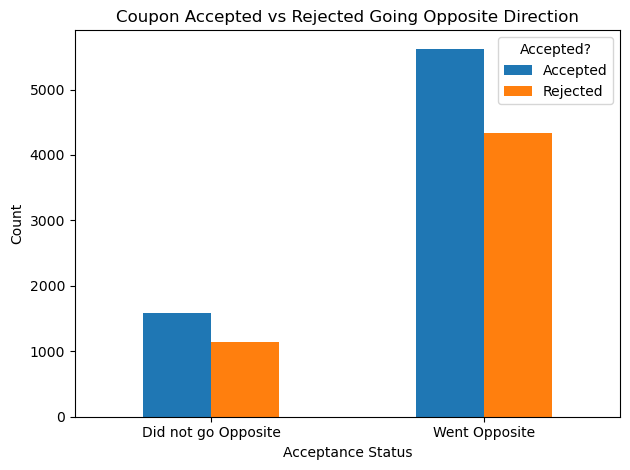

In [242]:
total_coupon_accepted_going_opposite.plot(kind="bar")
plt.title("Coupon Accepted vs Rejected Going Opposite Direction")
plt.xlabel("Acceptance Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/going_opposite_accepted_vs_rejected.png")
plt.show()
plt.close()

We can clearly see that majority coupon has been offered where the driver has to go opposite direction

Also it shows that with a good coupon people are willing to go Opposite direction

The final check that I will perform on the current dataset is how many of this people going in Opposite direction are for quick detour.

In [249]:
df_went_opp = ds_go_opp[ds_go_opp['Went Opposite Direction'] == 'Went Opposite']
df_went_opp_long_detour = df_went_opp[df_went_opp['Long Detour'] == 1]

df_went_opp_long_detour.sample(10)

,Restaurant Type,direction_opp,Long Detour,Coupon Accepted,Accepted?,Went Opposite Direction
9457,Bar,1,1,0,Rejected,Went Opposite
8976,Bar,1,1,1,Accepted,Went Opposite
2839,Bar,1,1,1,Accepted,Went Opposite
12165,Carry out & Take away,1,1,0,Rejected,Went Opposite
6643,Carry out & Take away,1,1,1,Accepted,Went Opposite
10162,Bar,1,1,1,Accepted,Went Opposite
12123,Restaurant(<20),1,1,0,Rejected,Went Opposite
8165,Restaurant(<20),1,1,0,Rejected,Went Opposite
6403,Carry out & Take away,1,1,0,Rejected,Went Opposite
381,Coffee House,1,1,1,Accepted,Went Opposite


In [250]:
total_coupon_accepted_went_opposite_long_detour = df_went_opp_long_detour["Accepted?"].value_counts()
print(total_coupon_accepted_went_opposite_long_detour)

Accepted?
Rejected    863
Accepted    648
Name: count, dtype: int64


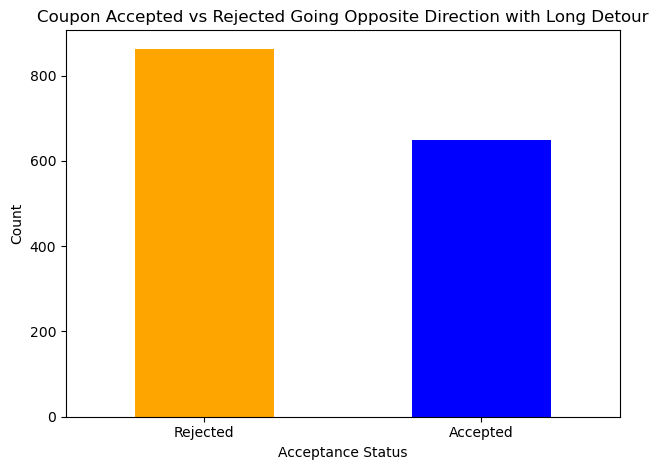

In [252]:
total_coupon_accepted_went_opposite_long_detour.plot(kind="bar", color=['orange', 'blue'])
plt.title("Coupon Accepted vs Rejected Going Opposite Direction with Long Detour")
plt.xlabel("Acceptance Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/going_opposite_long_detour_accepted_vs_rejected.png")
plt.show()
plt.close()

Now this result clearly shows that even if people are ready to accept offers going opposite direction but if the detour is long the rejection % increases.

This was a great case study where we can start with small data analysis and add more attributes to the problem to get understanding of more complex scenarios

We can use this to identify the best criteria for Coupon targeting to reach more acceptance

---